<h3><b>Introduction to Data Analytics - Exercise set 4, exercise 4</b></h3>

<h4><b>Youtube channel popularity dataset</b></h4>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_4/youtube.png" />

<b>Tip:</b> You can just click "Run All" to see the results of this notebook. Some of these exercises have some heavy plots that can take even 1 minute to produce.

<b>Remember:</b> not every dataset has interesting correlations and/or features (too much randomness or variance usually, or not enough data, or data is just self-explanatory). Also, not each correlation implies there's a causation. Finally, not every plot is useful, that's why it's important to try multiple plots in order to "see under the hood". Typically pair plots, joint plots, regression plots, heatmaps and box plots are most useful, but there are some exceptions too.

<h3><b>Quick summary of data:</b></h3>

<p>This dataset contains information on most popular / subscribed YouTube channels. The data includes the channel rank, amount of subscribers, video count, video views, YouTuber/channel name, category and the year the channel started.</p>

<p>Original data: <a href="https://www.kaggle.com/datasets/themrityunjaypathak/most-subscribed-1000-youtube-channels">https://www.kaggle.com/datasets/themrityunjaypathak/most-subscribed-1000-youtube-channels</a></p>

<h3><b>Questions for this exercise:</b></h3>
<b>Answer the questions either as code comments or as markdown. Use separate cells to write your answers.</b><br/><br/>
<li>What features seem to affect the popularity of a YouTube channel?</li>
<li>Can we determine the "formula" on how to be successful in YouTube based on this data? Which columns affect the popularity the most?</li>

<b>Extra questions/tasks for extra points:</b>
<li>What characteristics different YouTube channel categories seem to have on different columns?</li>
<li>Any other ideas about this dataset? Any ways to expand or improve the dataset and the analysis?</li>


<hr />

<h4><b>Imports and load the original dataset</b></h4>

In [1]:
# import the common data analytics modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h4><b>Helper functions for data clean-up</b></h4>

In [2]:
# helper function that takes care of some messed category names 
# that contain a URL instead of an actual category
def fix_category(row):
    category = row['Category']

    if "https" in category:
        return "Other"
    else:
        return category

<h4><b>Data processing</b></h4>

In [3]:
# load the dataset
df = pd.read_csv("youtube.csv")

# clean up the subscribers, video views and video count  -columns
df['Subscribers'] = df['Subscribers'].str.replace(",", "").astype("int64")
df['Video Views'] = df['Video Views'].str.replace(",", "").astype("int64")
df['Video Count'] = df['Video Count'].str.replace(",", "").astype("int64")

df['Category'] = df.apply(fix_category, axis=1)

# remove channels without videos and videos that are marked before YouTube existed (faulty data)
df = df[df['Video Count'] > 0]
df = df[df['Started'] > 2000]

# adding a new column, does average video view per amount of subscribers affect the analysis?
df['views_per_sub'] = df['Video Views'] / df['Subscribers']

# filter out 6 most common categories
categories = list(df['Category'].value_counts().index)
common_categories = categories[0:6]

# filter out only common categories
df2 = df[df['Category'].isin(common_categories)].copy()

# save correlations for further inspecting
correlations = df.corr(numeric_only=True)
correlations2 = df2.corr(numeric_only=True)

<h4><b>seaborn plots - pair plots</b></h4>

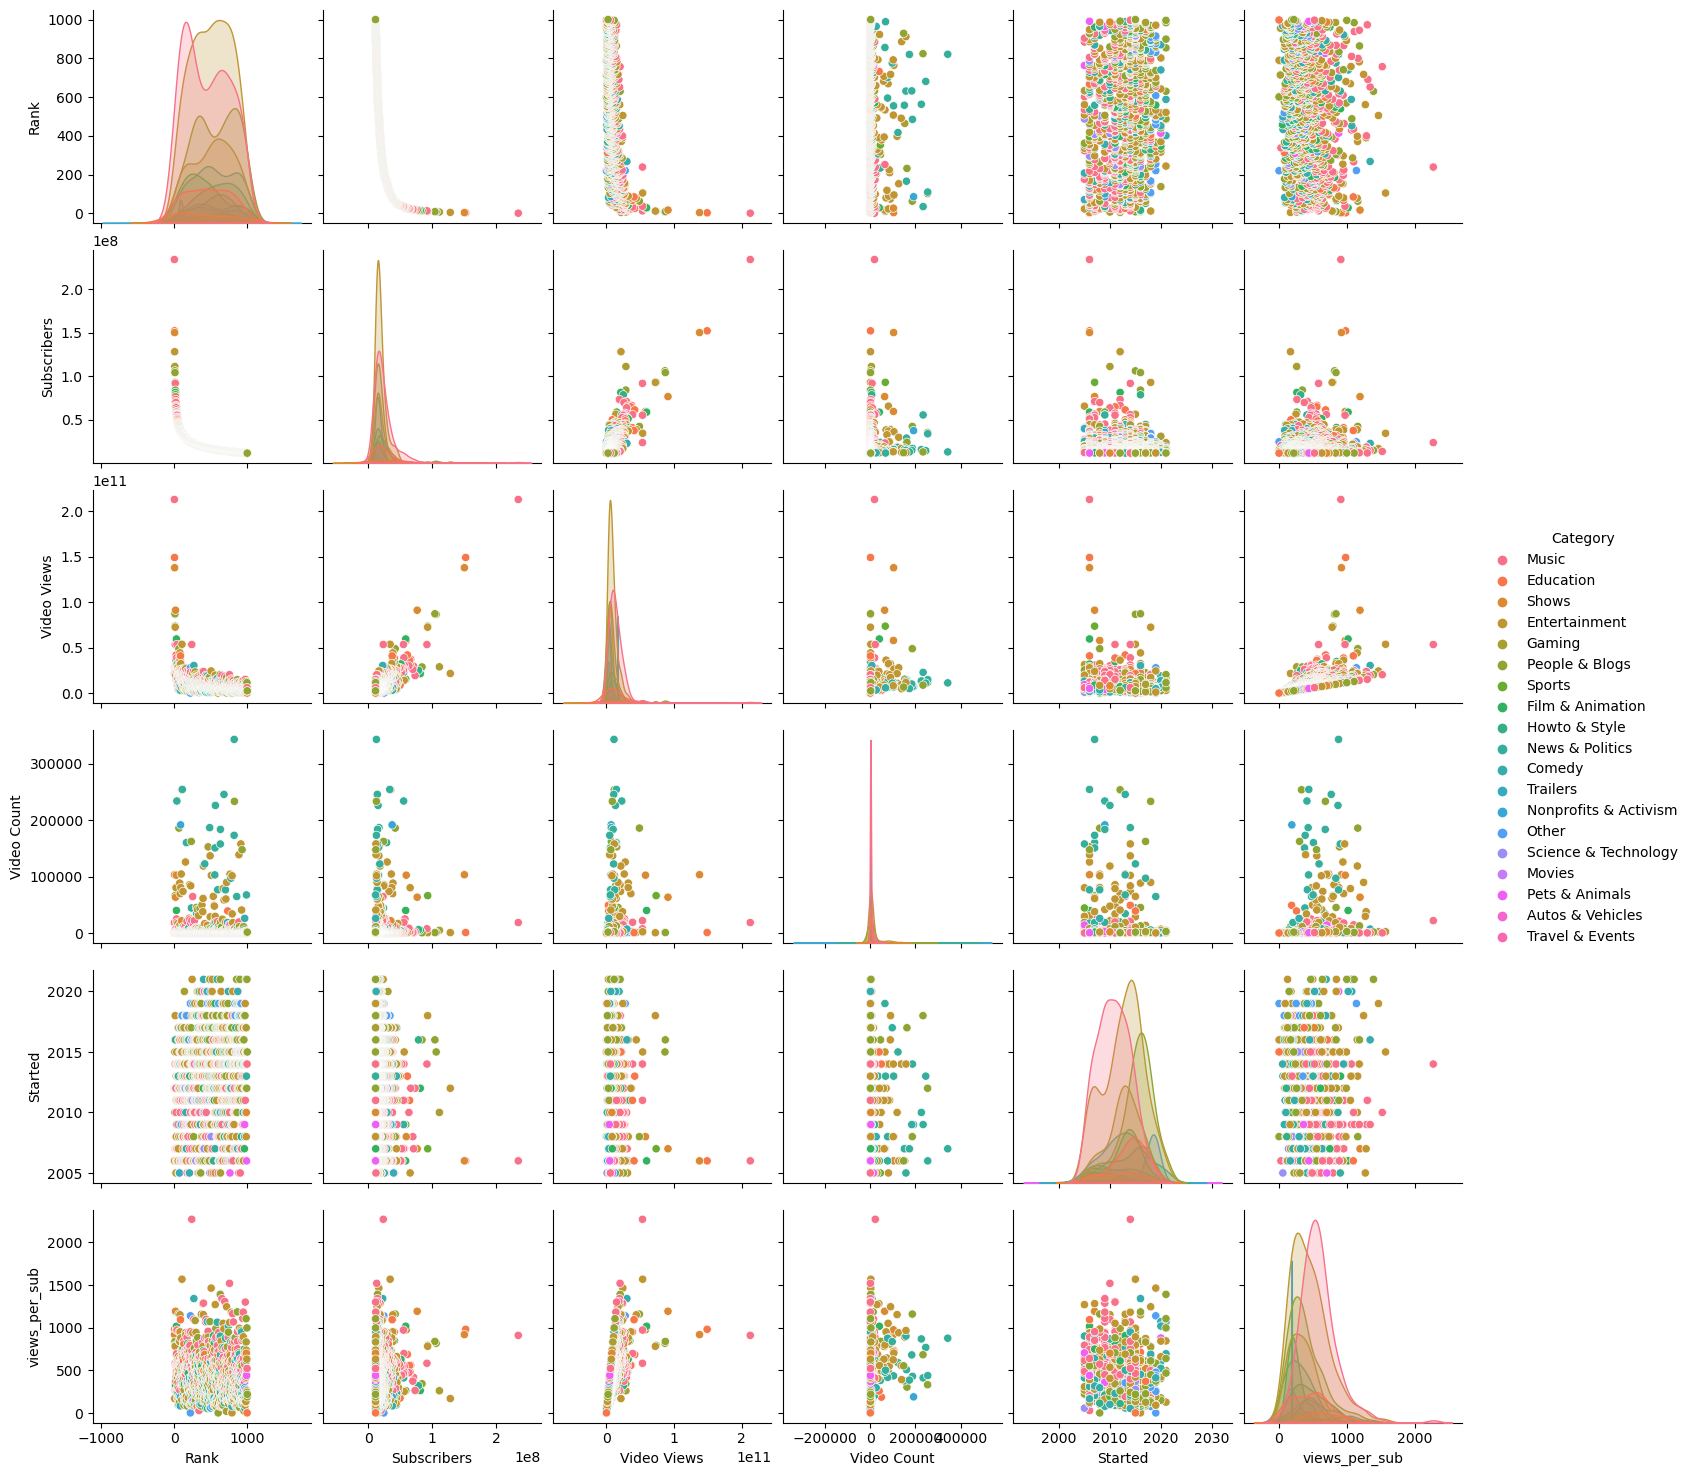

In [4]:
# pairplot, hue on category, original dataset
sns.pairplot(df, hue='Category')

# I don't see any correlations here
# probably, I would delete this pairplot

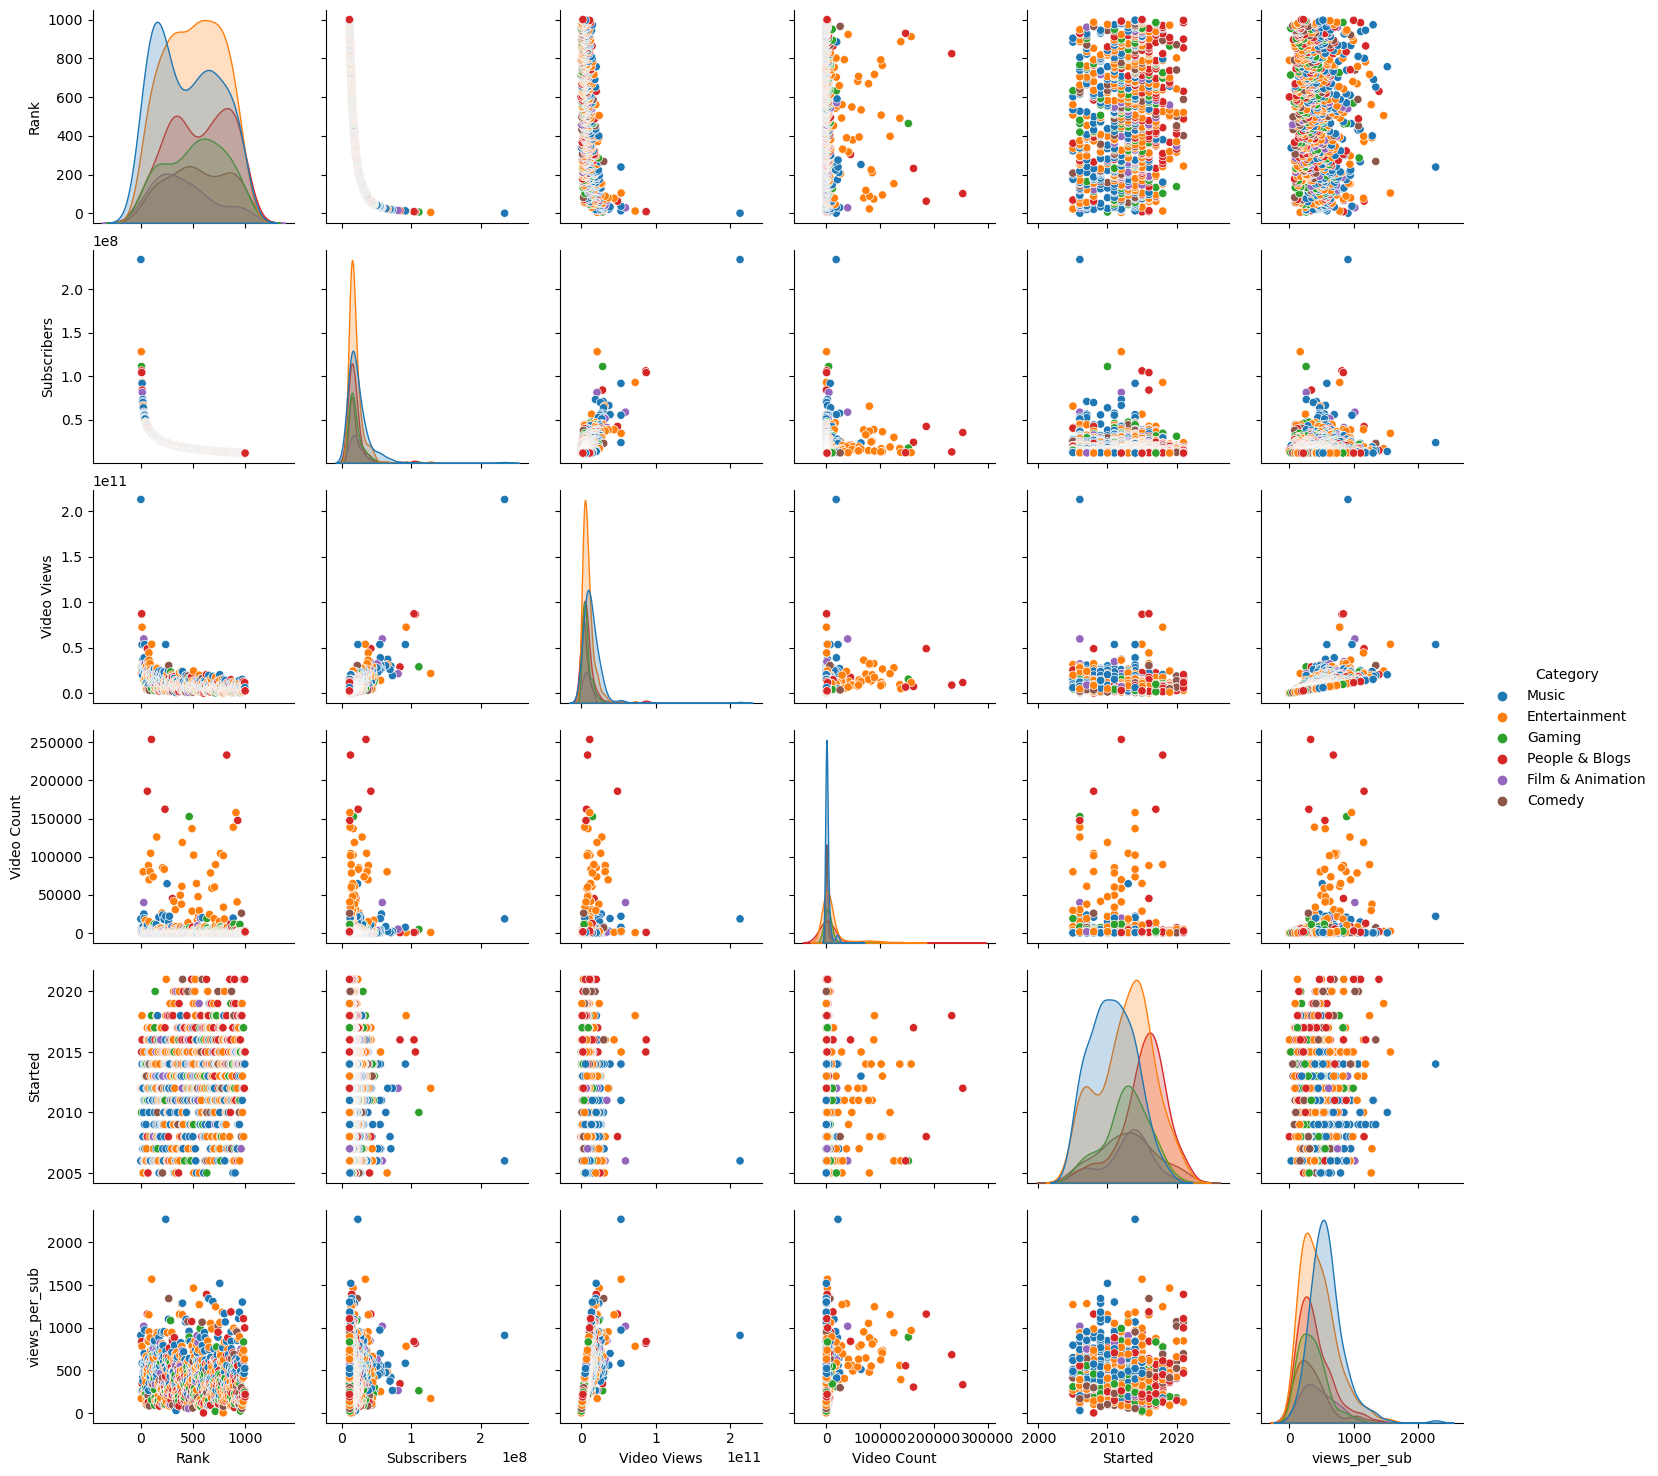

In [5]:
# pairplot, hue on category, filtered dataset (most common categories only)
sns.pairplot(df2, hue='Category')

# I don't see any correlations here
# probably, I would delete this pairplot

<h4><b>seaborn plots - linear regression plots</b></h4>

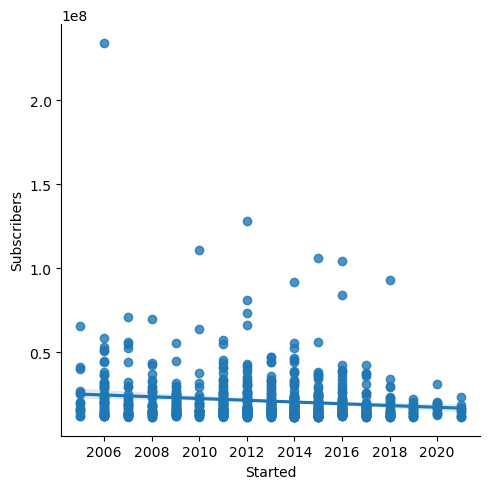

In [6]:
# linear regression plot, Start year and Subscribers
sns.lmplot(x='Started', y='Subscribers', data=df2)

# we can see some outliners
# but I do not see any correlations between year and subscribers
# but we can see a trend that getting followers in the last years (2019-2021)
# becameo more difficult. This is true becuase considering my professional 
# experience, followers became more expensive and bloggers have to spend
# more money for promotion their blogs

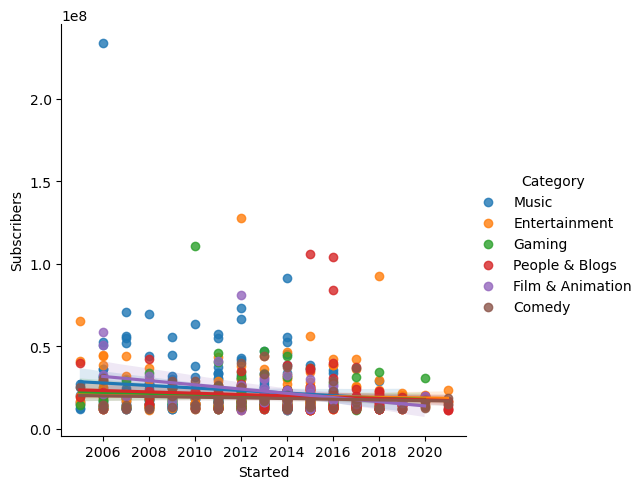

In [7]:
# linear regression plot, Start year and Subscribers, hue on category
sns.lmplot(x='Started', y='Subscribers', data=df2, hue="Category")

# this is a not clear linear regression plot
# becuase coulours are mixed but we can clearly see
# that music category appears in the top much more than others
# also, we can see that comedy does not have a lot followers
# comedy is on the bottom

# also we can see some outliners. Probably, I would rather 
# to delete them or change them by mean

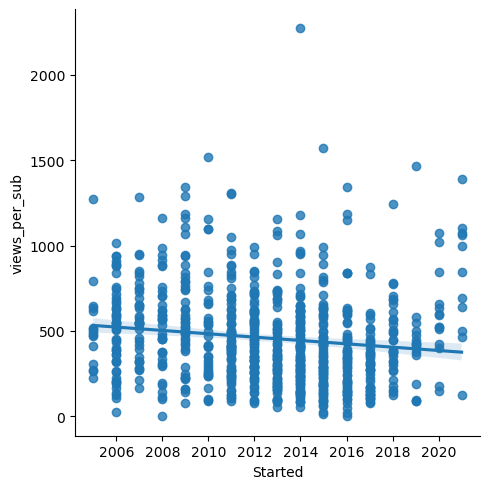

In [8]:
# linear regression plot, Start year and views per subscriber
sns.lmplot(x='Started', y='views_per_sub', data=df2)

# here we can see a negative trend that 
# people started to watch less YouTube
# value "views_per_sub" decreased suddenly in 2016 year
# I think, it connects with launching TikTok in 2016
# and also with growing of audience (I mean, people who watched YouTube 
# earlier, can stop to watch because of changing interest or starting to have
# jobs, children, families and etc)

# I would add data about viewers age. It would help to understand 
# the content of categories. Was YouTube more popular among children
# or teenagres, or adults?
# YouTube was launched in 2005. What age of viewers was the most popular?
# It could help to understand why they stopped to watch YouTube
# or why YouTube did not attract the new audience (who is the main target client of YouTube?)

# I think, more data about clients could help to determine the "formula" on how to be successful in YouTube

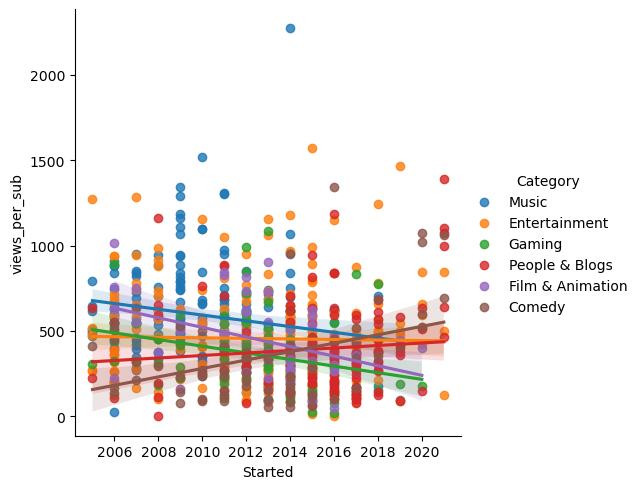

In [9]:
# linear regression plot, Start year and views per subscriber, hue on category
sns.lmplot(x='Started', y='views_per_sub', data=df2, hue="Category")

# we can see that earlier (2006 - 2012) music category had more
# views_per_sub than others but after that the category decreased
# we can see that Entertainment category has some outliners
# and keep to be on the top during the whole time

# It would be nice to add to the data description
# what entertainment category means. It could help
# understand what is a content a person need to create to become populs

# The entertainment category looks at covering everything related 
# to pop-culture and celebrities. Think of companies like "TMZ" or "Extra!" 
# whose whole business model is making content and news revolving around celebrities lives.
# source: https://entreresource.com/youtube-video-categories-full-list-explained-and-which-you-should-use-in-2022/

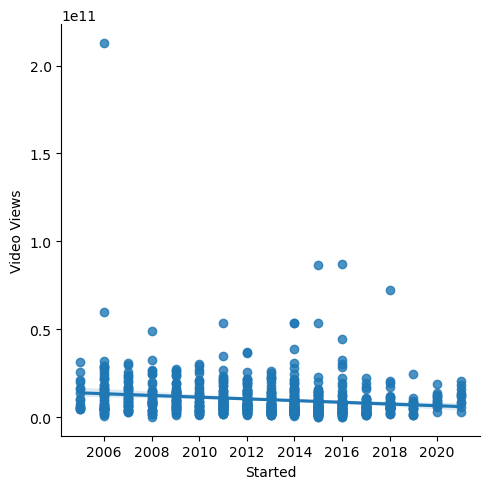

In [45]:
# linear regression plot, Start year and video view count
sns.lmplot(x='Started', y='Video Views', data=df2)

# formula of success: if you want to have a popular YouTube blog,
# you had to start erlier than 2016 :) now it is a little bit late😄

# okay, now more seriuosly. the same info as before

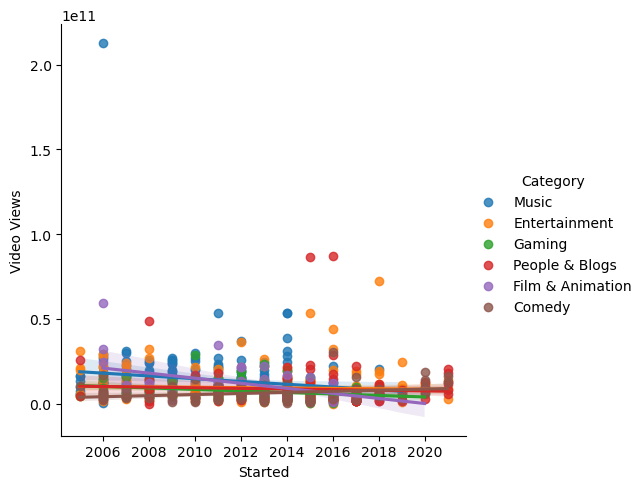

In [11]:
# linear regression plot, Start year and video view count, hue on category
sns.lmplot(x='Started', y='Video Views', data=df2, hue="Category")

# the same info as before

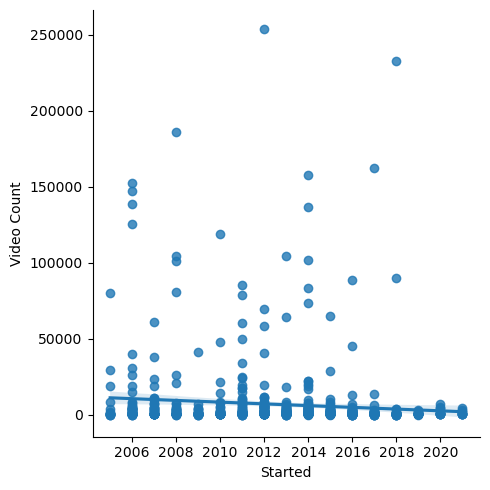

In [12]:
# linear regression plot, Start year and video count
sns.lmplot(x='Started', y='Video Count', data=df2)

# this is an interesting plot becuase we can see
# that after 2018 bloggers started to produce less videos
# it can also affect on amount of views
# less interesting content -> less views_per_sub
# probably, there is a correlation, we need to check

# we can see that in 2012 year there is an outliner and a peak
# of video count. I googled a little bit and found that 
# "In 2012, YouTube reported that roughly 60 hours of new videos are uploaded
# to the site every minute, and that around three-quarters of the material comes 
# from outside the U.S. The site has eight hundred million unique users a month.
# source: https://en.wikipedia.org/wiki/History_of_YouTube

# but I did not find info why exactly 2012? Why it decreased in the next years?

<Axes: >

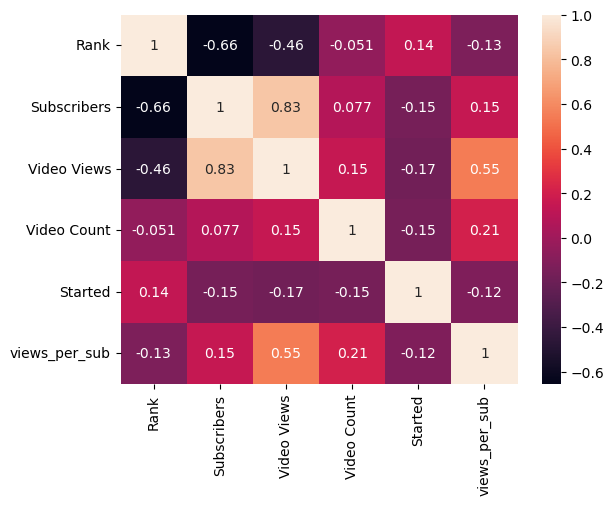

In [42]:
# basic heatmap to see do we have correlation
# between video count  and views_per_sub
sns.heatmap(correlations, annot=True)

# No, we do not have. My hypothesis was wrong

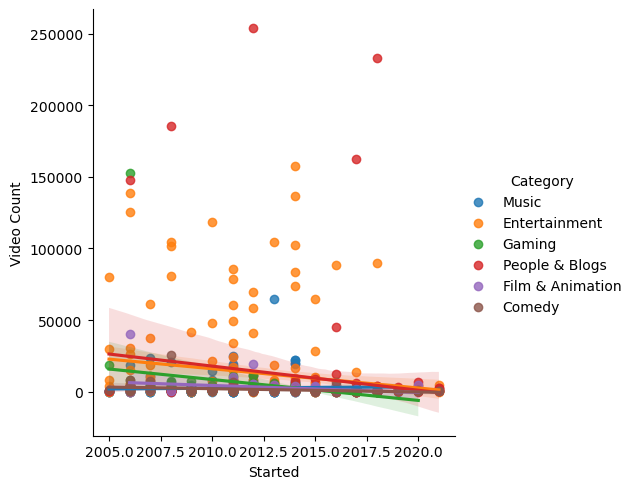

In [13]:
# linear regression plot, Start year and video count, hue on category
sns.lmplot(x='Started', y='Video Count', data=df2, hue="Category")

# we can see that bloggers produced more video in the entertaiment
# category. There are some outliners in People & Blogs
# if a person wants to create a famous YouTube channel,
# they have to crate a video in the entertaiment category

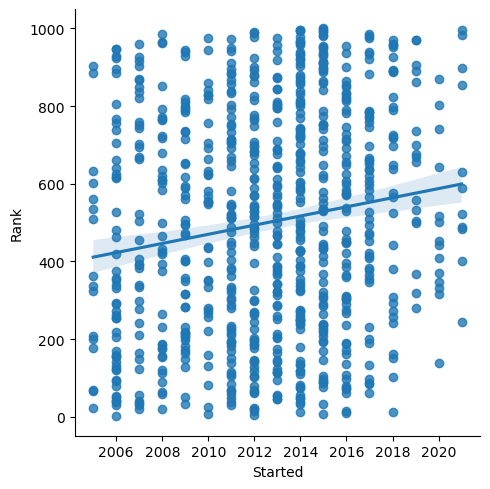

In [14]:
# linear regression plot, Start year and rank
sns.lmplot(x='Started', y='Rank', data=df2)

# In the data description there is no info what rank is
# I would add this info to make data clearer for analysits

# You get different ranks considering amout of followers
# "Silver: When you reach 100,000 subscribers. Gold: When you reach 1,000,000 subscribers., etc"
# Source: https://support.google.com/youtube

# I do not understand why the rank is between 0 and 1000
# is it amount of channels who have been ranked? If yes, 
# in this case did they get Silver, Golden or another rank?

# anyway, we can see big amount of ranked channels
# between 2011 and 2017 years

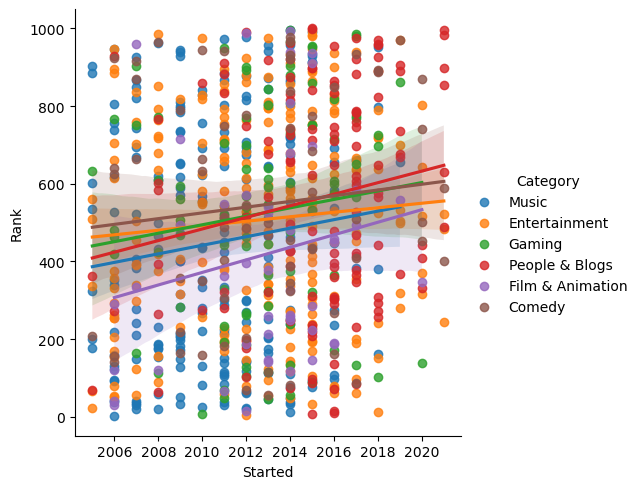

In [15]:
# linear regression plot, Start year and rank, hue on category
sns.lmplot(x='Started', y='Rank', data=df2, hue="Category")

# here we can see that Entertaiment and People & Blogs category
# have been more ranked than others

# if a person wants to be popular, they have to create
# video in these two catergories 

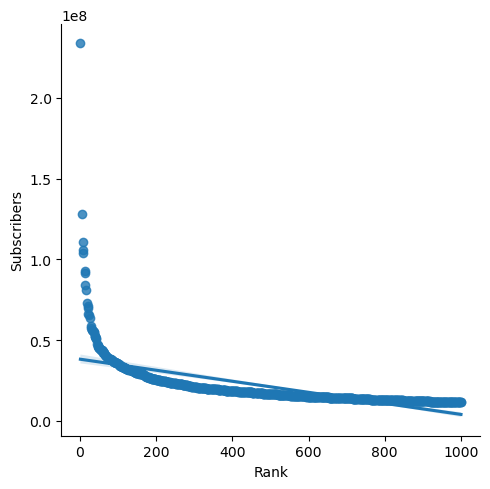

In [16]:
# linear regression plot, Rank and subscribers
sns.lmplot(x='Rank', y='Subscribers', data=df2)

# I think, I can read this plot in the next way:
# getting more subscribers is more difficult
# that's why bloggers with less amount of subscribers
# have more ranks. In total, we have more small bloggers

# but I think, this plot does not help us to determine the formula
# of succefull YouTube channels

# I would rather to delete this plot

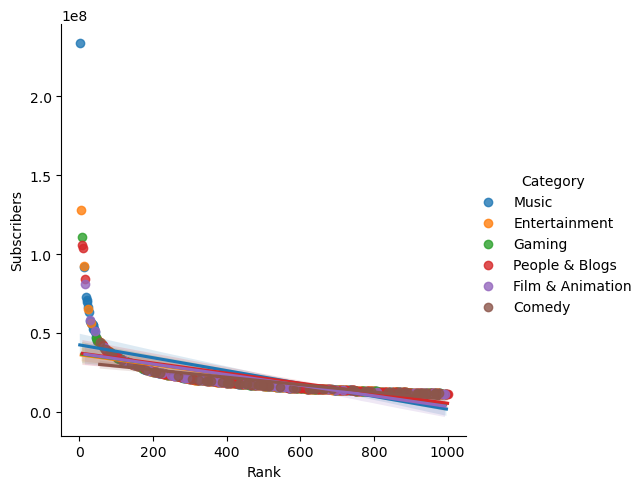

In [17]:
# linear regression plot, Rank and subscribers, hue on category
sns.lmplot(x='Rank', y='Subscribers', data=df2, hue="Category")

# I would rather to delete this plot
# because colours are messy

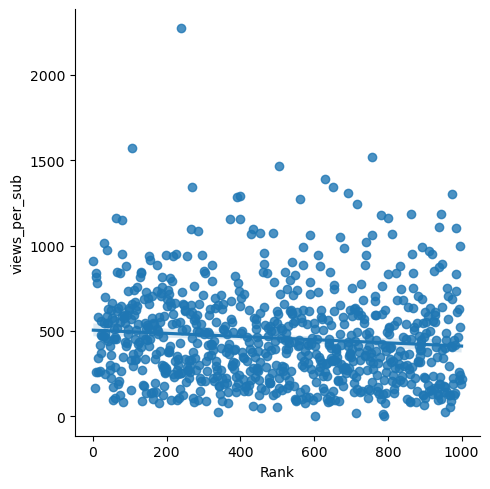

In [18]:
# linear regression plot, Rank and views per subscribers
sns.lmplot(x='Rank', y='views_per_sub', data=df2)

# the same info as before

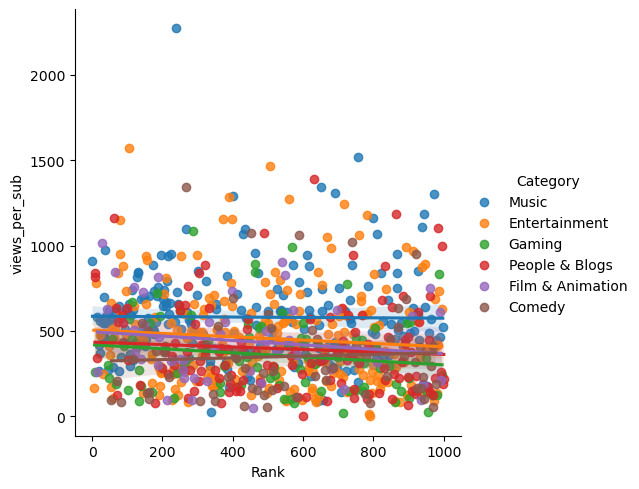

In [19]:
# linear regression plot, Rank and views per subscribers, hue on category
sns.lmplot(x='Rank', y='views_per_sub', data=df2, hue="Category")

# here we can see that the Music category is on the top
# but considering previous plots, we know, that now the 
# music category is not very popular
# that's why I will not include this catergory to the formula

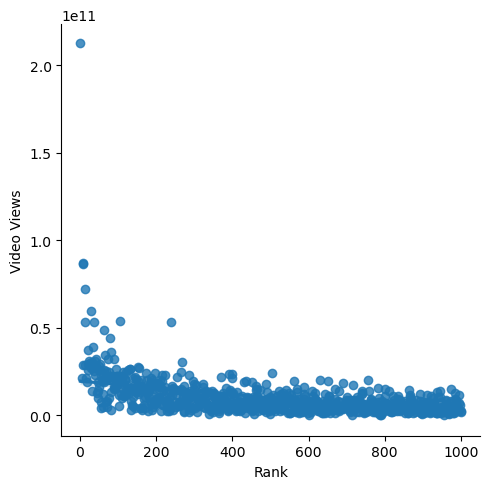

In [20]:
# linear regression plot, Rank and video view count
sns.lmplot(x='Rank', y='Video Views', data=df2)

# I would rather to delete this plot
# becuase it does not help us to determine the formula

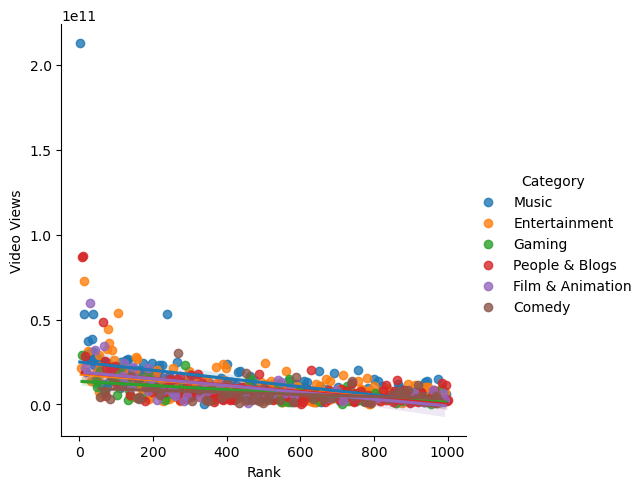

In [21]:
# linear regression plot, Rank and video view count, hue on category
sns.lmplot(x='Rank', y='Video Views', data=df2, hue="Category")

# the same info as before

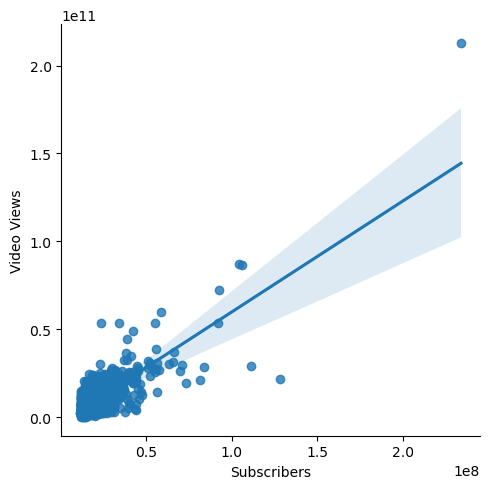

In [22]:
# linear regression plot, Rank and video view count, hue on category
sns.lmplot(x='Subscribers', y='Video Views', data=df2)

# As I said before I would delete outliners because 
# it misrepresents the data
# but anyway we can see here that if a blogger has more followers
# it becomes more difficult to get more views
# I can prove it by my work experience. I worked with bloggers
# who had millions of subscribers, and it was difficult to get
# the interests as it was with a little amount of followers

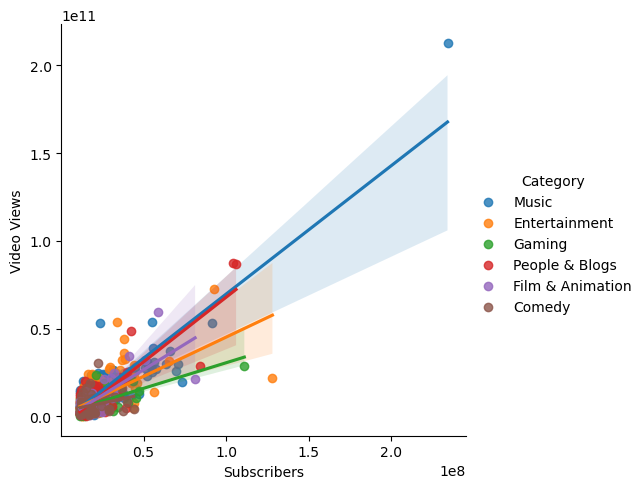

In [23]:
# linear regression plot, Rank and video view count, hue on category
sns.lmplot(x='Subscribers', y='Video Views', data=df2, hue="Category")

# the same info as before

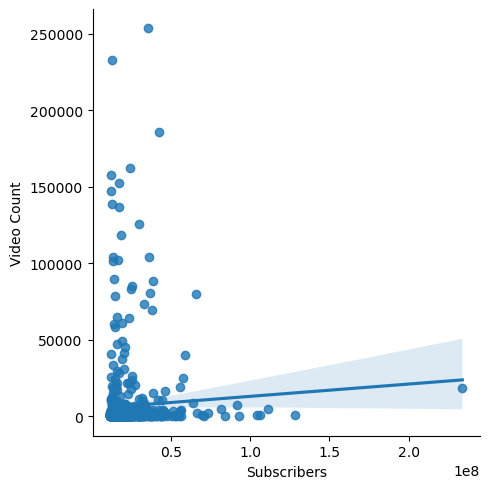

In [24]:
# linear regression plot, Rank and video count, hue on category
sns.lmplot(x='Subscribers', y='Video Count', data=df2)

# we can see that amount of videos does not affect on subscribers

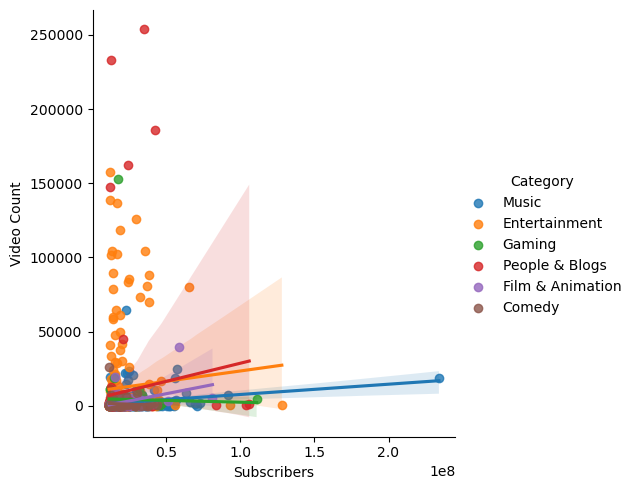

In [25]:
# linear regression plot, Rank and video count, hue on category
sns.lmplot(x='Subscribers', y='Video Count', data=df2, hue="Category")

# the same info as in the previous one
# we can see that amount of videos does not affect on subscribers

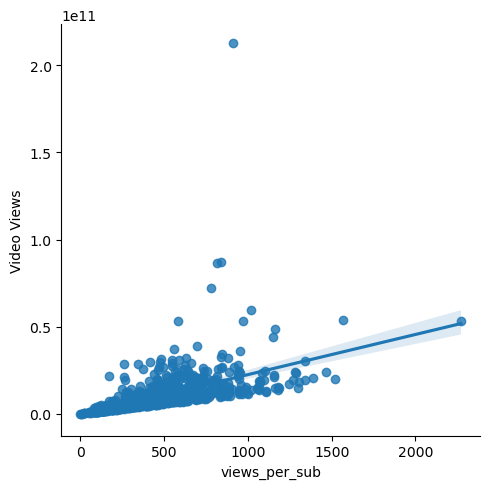

In [26]:
# linear regression plot, views per subscribers and video views
sns.lmplot(x='views_per_sub', y='Video Views', data=df2)

# finally, our first small correlation
# one follower can a "fan" and watch all videos on the channel

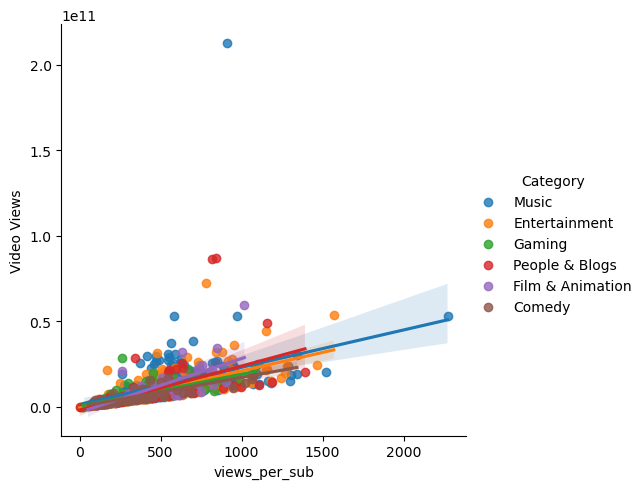

In [27]:
# linear regression plot, views per subscribers and video views, hue on category
sns.lmplot(x='views_per_sub', y='Video Views', data=df2, hue="Category")

# the same info as in the previous one

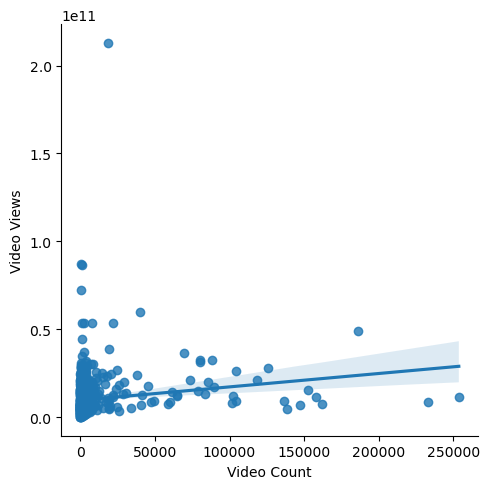

In [28]:
# linear regression plot, video count and video views
sns.lmplot(x='Video Count', y='Video Views', data=df2)

# it is soooo small correlation
# of course, if we have more videos, we increase chances to have more views
# but there is no big correlation between these two

# to conclude, it is more important to concetrate on the quality of videos than on quantity 

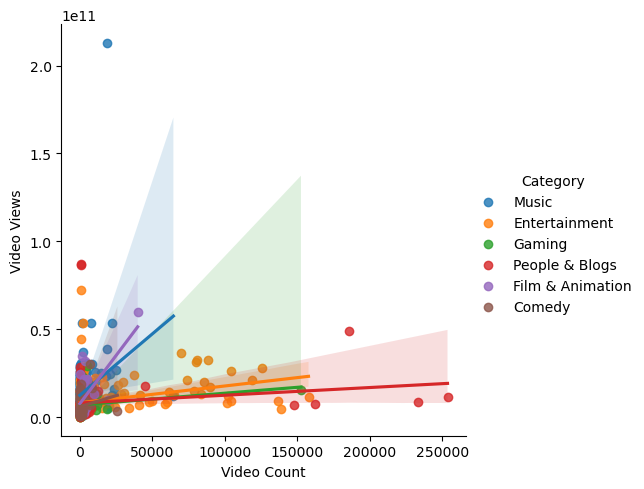

In [29]:
# linear regression plot, video count and video views, hue on category
sns.lmplot(x='Video Count', y='Video Views', data=df2, hue="Category")

# I would delete this plot because of outliners
# data is not easy to read

<h4><b>seaborn plots - box plots</b></h4>

In [30]:
# helper function that combines years to make it easier to use box plot
# data is between 2005 and 2021
def combine_years(row):
    year = int(row['Started'])

    if 2005 <= year < 2009:
        return 2005.2009
    elif 2009 <= year < 2013:
        return 2009.2013
    elif 2013 <= year < 2017:
        return 2013.2017
    else:
        return 2017.2021
    
    
# create column    
df2['year_span'] = df2.apply(combine_years, axis=1)

<Axes: xlabel='Category', ylabel='Rank'>

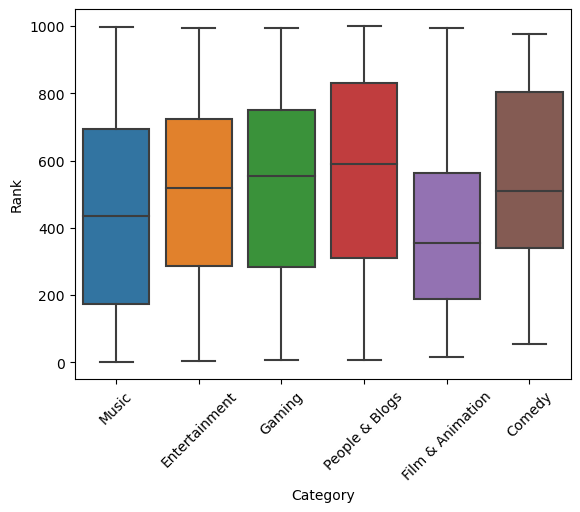

In [31]:
# box plot on category and rank, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='Category', y='Rank', data=df2)

# this box plot gives more specific and accurate info
# than regression plots earliers
# here we can see that People & Blogs are more ranked than other
# and we have a new info that Comedy takes the second place
# Gaming is the 3rd place, and entertaiment is after them

<Axes: xlabel='Category', ylabel='Subscribers'>

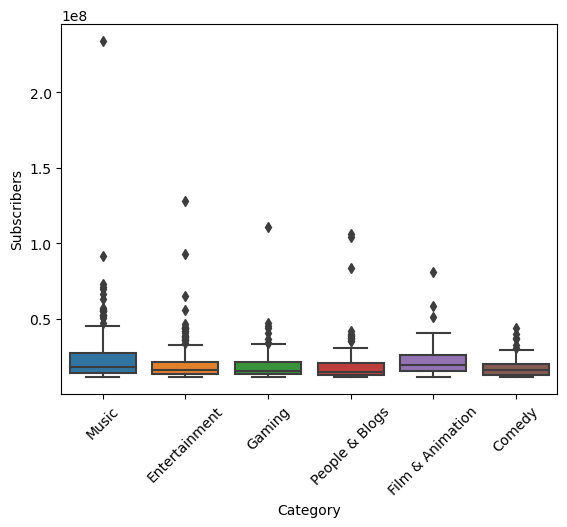

In [32]:
# box plot on category and subscribers, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='Category', y='Subscribers', data=df2)

# This is a surprise! We can see that Music have the biggest amount of followers
# after that the Film & Animation category

<Axes: xlabel='Category', ylabel='views_per_sub'>

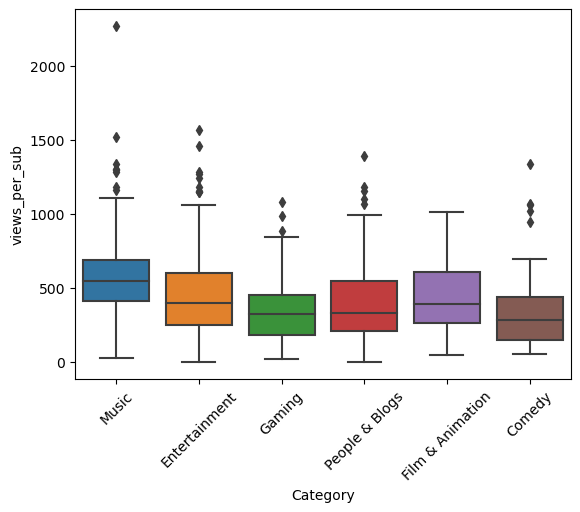

In [33]:
# box plot on category and views per subscribers, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='Category', y='views_per_sub', data=df2)

# here we can see again that
# Music and Film & Animation categories have the best results

<Axes: xlabel='Category', ylabel='Video Views'>

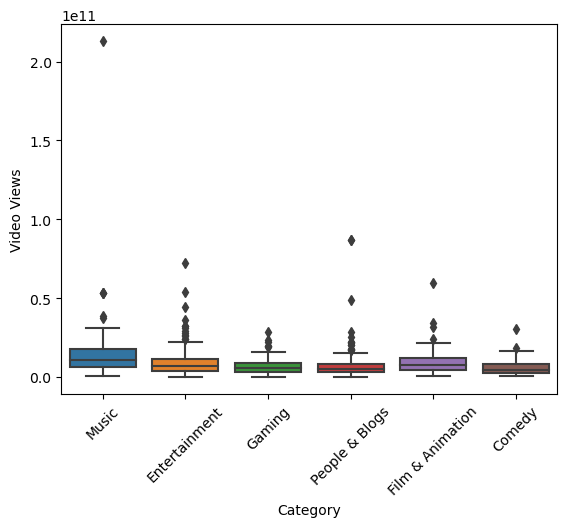

In [34]:
# box plot on category and video views, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='Category', y='Video Views', data=df2)

# the same here

# I google that "Music videos are always the most popular content on YouTube"
# source: https://mugafi.com/blog/10-most-watched-categories-of-youtube-videos
# but we could see earlier that music became less popular
# I think, it connects with Spotify launching

<Axes: xlabel='Category', ylabel='Video Count'>

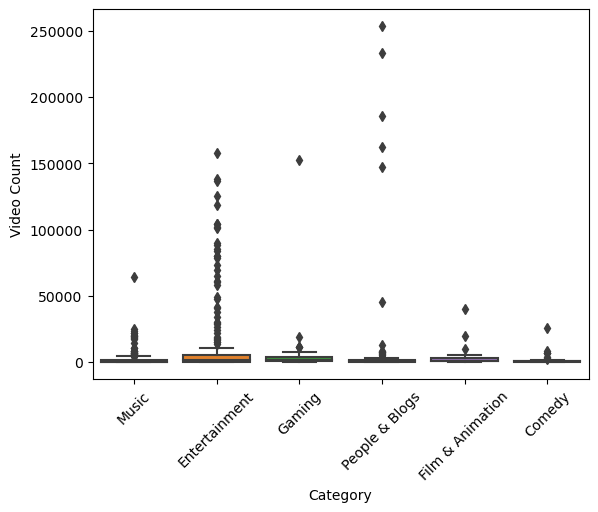

In [35]:
# box plot on category and video count, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='Category', y='Video Count', data=df2)

# here we can see that have more videos in the People & Blogs category
# I think the reason of that is easier content production
# the same though with the Entertaiment category

<Axes: xlabel='year_span', ylabel='Subscribers'>

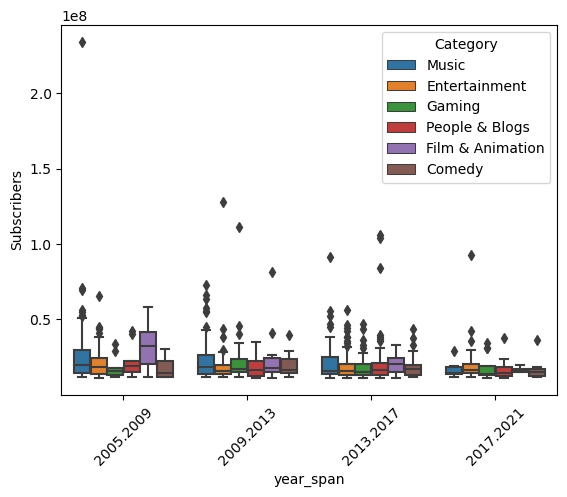

In [36]:
# box plot on year_span and subscribers, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='year_span', y='Subscribers', data=df2, hue='Category')

# again I would delete the outliner in the span 2005-2009
# it would help to see the data in more details

# but anyway, we can see the same info as before

<Axes: xlabel='year_span', ylabel='Video Views'>

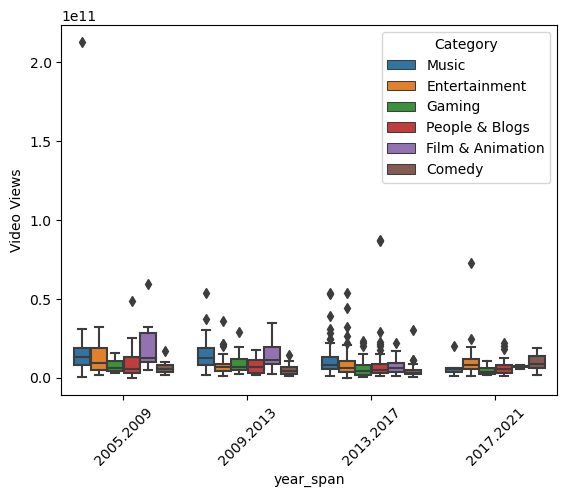

In [37]:
# box plot on year_span and video views, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='year_span', y='Video Views', data=df2, hue='Category')

# useful the box plot
# we can see the same info as before

<Axes: xlabel='year_span', ylabel='Video Count'>

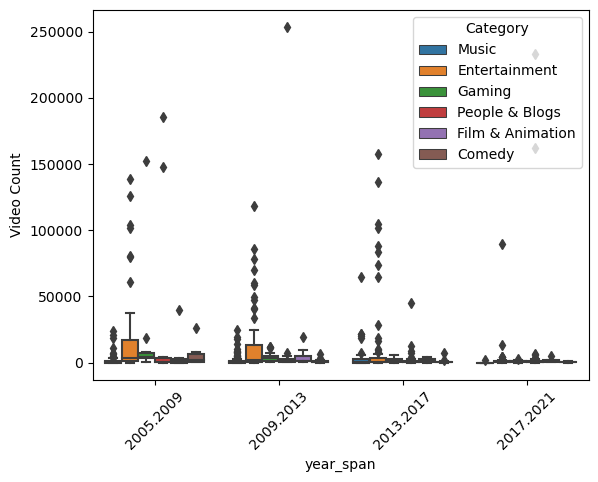

In [38]:
# box plot on year_span and video count, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='year_span', y='Video Count', data=df2, hue='Category')

# here we can see that the Entertaiment category produced
# much more video than others during all year spans

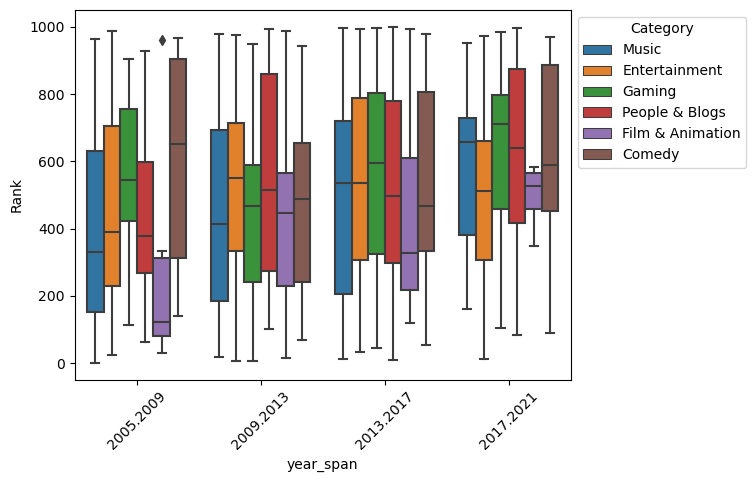

In [43]:
# box plot on year_span and rank, tilt bottom labels by 45 degrees
# also move the legend on the right side of data so it doesn't stand on top of the plot
plt.xticks(rotation=45)
ax = sns.boxplot(x='year_span', y='Rank', data=df2, hue='Category')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# surprise about the Comedy catergory in the last year span
# we can see that the category takes one of top places during all years
# we could not see this info before or I was blind😃

# We can add to the formula that people can create content in the 
# comedy category too, if they want to become popular

<h4><b>seaborn plots - heatmaps for correlation matrices</b></h4>

<Axes: >

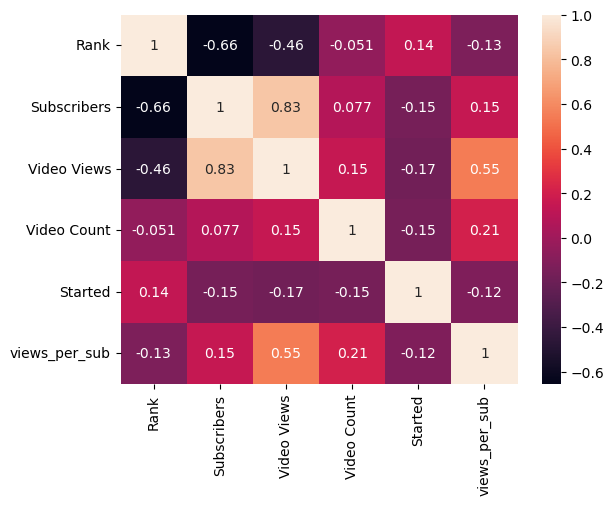

In [40]:
# basic heatmap for correlation matrix
sns.heatmap(correlations, annot=True)

# I used this map before too
# no surprises, only one obvious correlation
# between subscribers and video views

<Axes: >

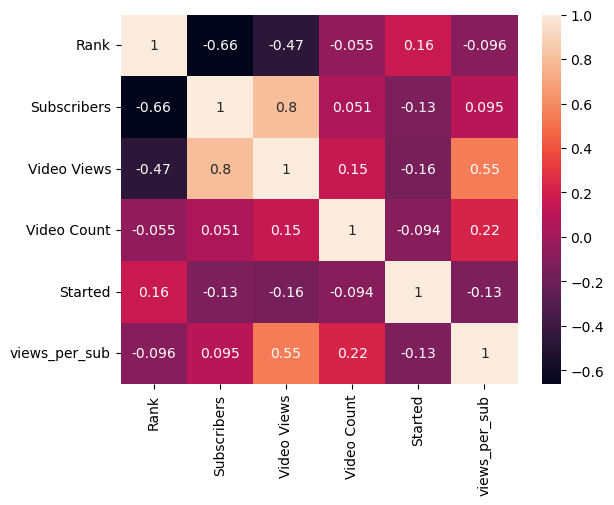

In [41]:
# basic heatmap for correlation matrix, only most popular categories
sns.heatmap(correlations2, annot=True)

# I would rather to delete this heatmap
# no any significant correlation